<a href="https://colab.research.google.com/github/dhiren11lab/DATA-MINING/blob/main/lab_05(ADM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [ ]:
#create synthetic data
np.random.seed(42)
data = np.random.normal(0,1,100)  #Normal Distribution
outliers=np.random.uniform(5,10,5)  #artificial outliers
data_with_outliers = np.concatenate([data, outliers])

In [ ]:
data_series = pd.Series(data)
data_series.describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [ ]:
#convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [ ]:
print(lower_bound)

-2.3232332563637335


In [ ]:
# Step 1: Detect Outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identifying outliers based on IQR
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

In [ ]:
# Step 2: Detect Outliers using Z-Score method
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

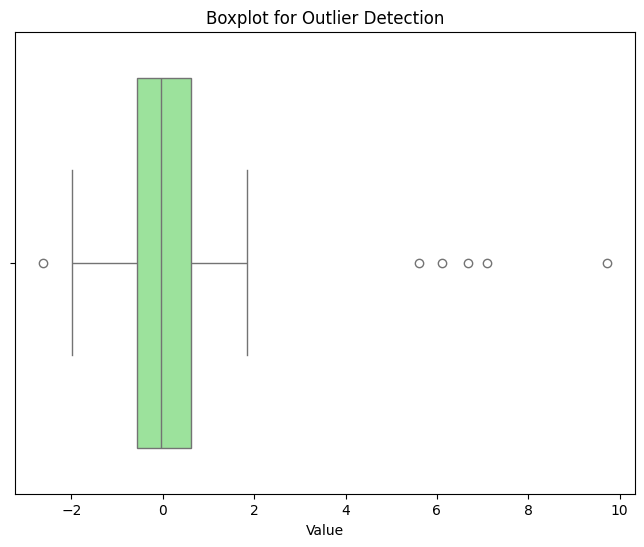

In [30]:
# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'],color='lightgreen')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Step 4: Handle Outliers
# Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [ ]:
# Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]

In [ ]:
# Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

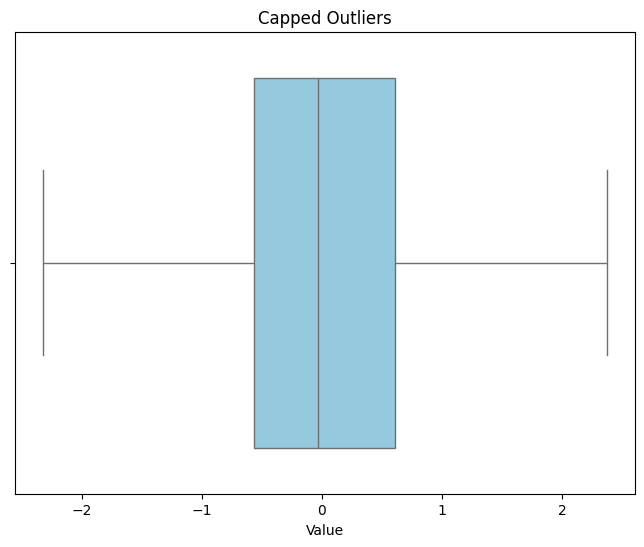

In [26]:
# Step 5: Visualize handled data
# Capped data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'],color='skyblue')
plt.title("Capped Outliers")
plt.show()

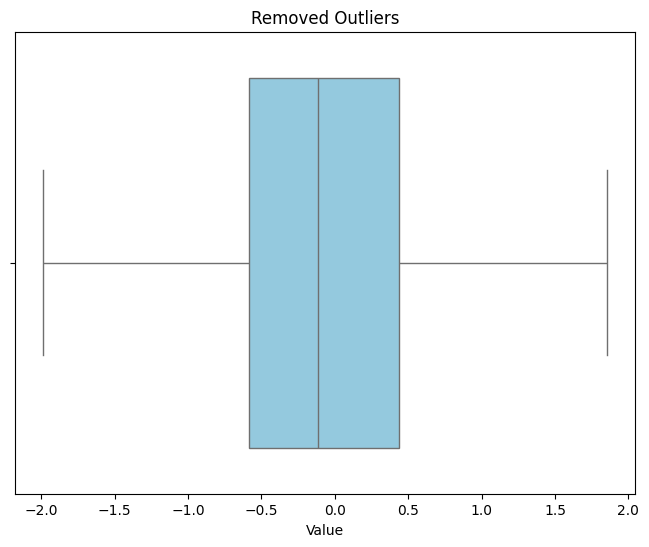

In [27]:
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'],color='skyblue')
plt.title("Removed Outliers")
plt.show()

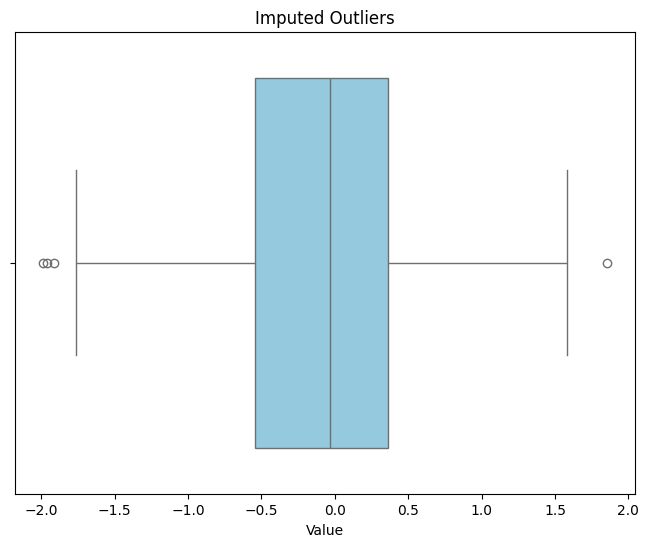

In [28]:
# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'],color='skyblue')
plt.title("Imputed Outliers")
plt.show()